In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#import dataset
df=pd.read_csv('FuelConsumption.csv')
print(df)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [7]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244


In [8]:
#seperate dependent and dependable variables
x=cdf.iloc[:, :-1].values
y=cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  8.5]
 [ 2.4  4.  11.2  9.6]
 [ 1.5  4.   6.   5.9]
 ...
 [ 3.   6.  13.4 11.8]
 [ 3.2  6.  12.9 11.3]
 [ 3.2  6.  14.9 12.8]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

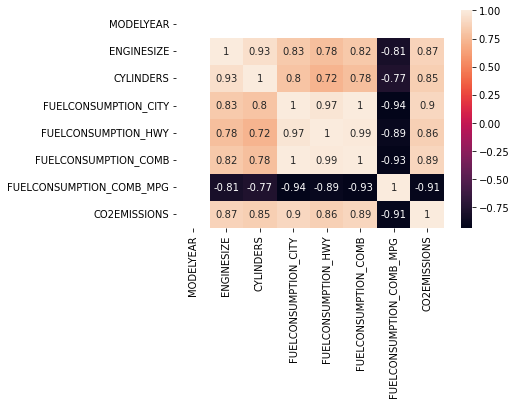

In [9]:
#check correlation between dependent variable and independent variables
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

In [17]:
print('coefficient:',regressor.coef_)
print(regressor.intercept_)

coefficient: [10.85020214  7.70065456  1.31319474  8.16856744]
64.88672116346811


In [18]:
print('Residual sum squares: %.2f' %np.mean((y_pred - y_test) **2 ))

Residual sum squares: 616.99


In [13]:
print(regressor.score(x_test, y_test))

0.8427287464028448


In [14]:
print(regressor.score(x_train, y_train))

0.8726420529101612


In [15]:
print(regressor.intercept_)
print(regressor.coef_)

64.88672116346811
[10.85020214  7.70065456  1.31319474  8.16856744]


<AxesSubplot:>

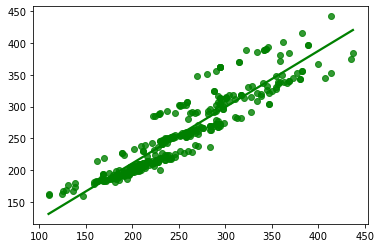

In [21]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="g")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

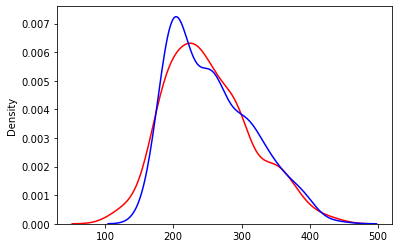

In [23]:
ax1=sns.distplot(y_test, hist=False, color='r', label='Actual values')
sns.distplot(y_pred, hist=False, color='b', label="Fitted values", ax=ax1)